In [23]:
%%capture
import sys
!{sys.executable} -m pip install --upgrade pip;
!{sys.executable} -m pip install numpy;
!{sys.executable} -m pip install scikit-learn;
!{sys.executable} -m pip install matplotlib;
!{sys.executable} -m pip install pandas;

## KNN

## CHATGPT prompts: "code a KNN python implementation ready to test and train for the dataset 'titanic'"

## CHATGPT result:

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Titanic dataset
data = pd.read_csv('train.csv')

# Remove unnecessary columns and missing values
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data = data.dropna()

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Split dataset into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using training data
knn.fit(X_train, y_train)

# Predict the labels for testing data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
    

Accuracy: 0.6853146853146853


## CHATGPT prompt: "now give other results such as confusion matrix, f-score, precision, recall and ROC"

## CHATGPT result:

Confusion Matrix:
 [[54 26]
 [19 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71        80
           1       0.63      0.70      0.66        63

    accuracy                           0.69       143
   macro avg       0.68      0.69      0.68       143
weighted avg       0.69      0.69      0.69       143

AUC: 0.6992063492063492


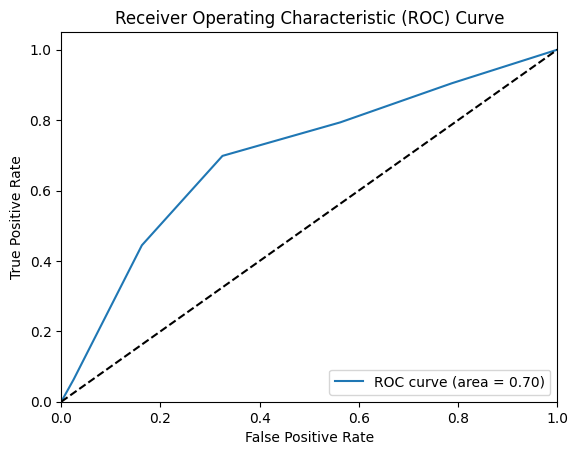

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Relatório KNN:

Pontos fortes:

    1. A implementação apresentada utiliza bibliotecas do scikit-learn.

Potenciais problemas:

    1. A escolha do valor correto de k pode ser um desafio, pois um valor muito baixo pode resultar em um modelo sensível a ruído e outliers, enquanto um valor muito alto pode resultar em um modelo subajustado.

    2. O desempenho do KNN depende da escolha apropriada dos hiperparâmetros, como o número de vizinhos considerados, a medida de distância usada e o tipo de peso aplicado.

Melhorias:

    1. Normalizar os dados pode ajudar a melhorar o desempenho do modelo, especialmente se as características dos dados tiverem escalas diferentes.

    2. Pode ser útil realizar a seleção de características para eliminar características irrelevantes ou redundantes. Isso pode ajudar a melhorar o desempenho do modelo e reduzir o tempo de processamento.

Observações gerais:

    1.


## Naive Bayes

## CHATGPT prompts: "code a Naive Bayes python implementation ready to test and train for the dataset 'titanic'" 

## CHATGPT result:

In [26]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
titanic = pd.read_csv('train.csv')

# Clean the dataset by removing unnecessary columns
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical features into numerical ones
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Replace missing values with the mean
titanic = titanic.fillna(titanic.mean())

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived'], axis=1), titanic['Survived'], test_size=0.2, random_state=0)

# Train the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7932960893854749


## CHATGPT prompts: "now give other results such as confusion matrix, f-score, precision, recall and ROC" 

## CHATGPT result:

Accuracy: 0.7932960893854749
Confusion Matrix:
 [[90 20]
 [17 52]]
F-score: 0.7375886524822696
Precision: 0.7222222222222222
Recall: 0.7536231884057971


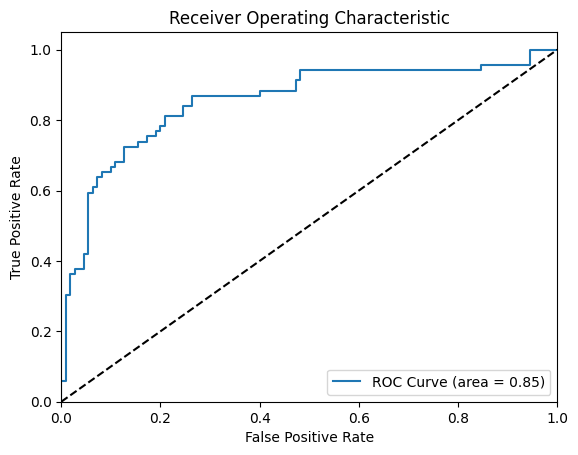

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Load the Titanic dataset
titanic = pd.read_csv('train.csv')

# Clean the dataset by removing unnecessary columns
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical features into numerical ones
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Replace missing values with the mean
titanic = titanic.fillna(titanic.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived'], axis=1), titanic['Survived'], test_size=0.2, random_state=0)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# F-score
fscore = f1_score(y_test, y_pred)
print('F-score:', fscore)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# ROC and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Relatório Naive Bayes:

Pontos fortes:

    1. 



Potenciais problemas:

Melhorias:

Observações gerais:


## - Árvore de decisão

## ChatGPT prompt: "code a decision tree implementation in python ready to test and train for the "titanic" dataset"

## ChatGPT result:

In [28]:
#Sure! Here's an implementation of a decision tree for the Titanic dataset using the scikit-learn library in Python. This implementation includes data cleaning, feature engineering, and model training.

#First, let's start by importing the necessary libraries:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Next, let's load the Titanic dataset into a pandas dataframe and do some basic cleaning:

df = pd.read_csv('train.csv')         #nesta linha foi alterado o nome do arquivo de 'titanic.csv' para 'train.csv'

# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Replace missing values in 'Age' column with median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Replace missing values in 'Embarked' column with most common value
most_common_embarked = df['Embarked'].value_counts().index[0]
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)


#Now, let's do some feature engineering by creating a new column 'FamilySize' which combines the 'SibSp' and 'Parch' columns:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


#We'll also create a new column 'IsAlone' which is 1 if the passenger is traveling alone (i.e. has no family members on board) and 0 otherwise:

df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


#Now we'll create dummy variables for the 'Sex' and 'Embarked' columns:

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


#Finally, we'll split the data into training and testing sets and train the decision tree model:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


#In this implementation, we've used a decision tree with a maximum depth of 3. You can experiment with different values for the maximum depth to see how it affects the accuracy of the model.

#I hope this helps!

Accuracy: 0.7988826815642458


## CHATGPT prompt: "now give other results such as confusion matrix, f-score, precision, recall and ROC"

## CHATGPT result:


Confusion matrix:
 [[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC score: 0.8463320463320464


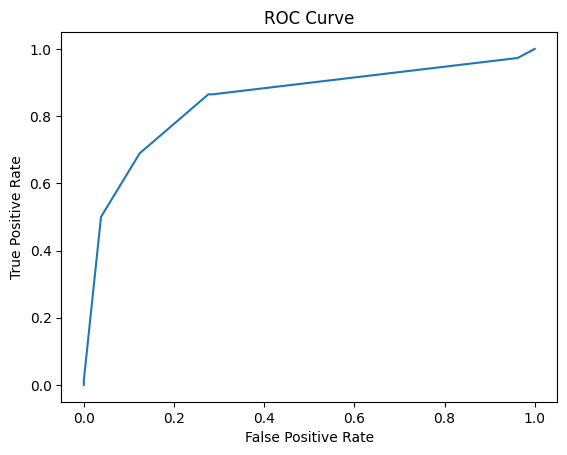

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot ROC curve and calculate AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print('AUC score:', auc_score)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Relatório Árvore de decisão:

Pontos fortes: 
    
    1. A escolha do parâmetro 3 para o valor 3 ajuda a evitar que o modelo se ajuste muito aos dados e treinamento e assim melhoramos seu desempenho generalizado

    2. Podermos de maneira fácil analisar várias outras métrica de avalição como como a matriz de confusão, pontuação F1, precisão, recall e curva ROC que nos permitem ter uma visão mais ampla e detalhada dos resultados do modelo.

    3. O código está fácil de ser utilizado e fácil de ser lido, são poucas linhas de código 

Potenciais problemas:

    1. Overfitting pode ser um dos problemas, mesmo com o max_depth ainda pode acontecer que o modelo se ajuste muito aos dados de treinamento podendo acalhar em um desempenho pior em novos dados.

    2. Seleção de recursos insuficiente, está sendo utilizado apenas um conjunto limitado de recursos para treinar o modelo. Podem haver outros recursos que são importantes para a previsão da sobrevivência, mas que não foram incluídos na análise.

    3. Limitações da árvore de decisão, o modelo é simples e interpretável, mas pode não ser capaz de capturar relações mais complexas entre os recursos e a variável de destino.

Melhorias: 

    1. A implementação do ChatGPT utiliza um conjunto limitado de recursos para o treino. Engenharia de recursos poderia ser utilizada para extrair informações adicionais dos dados.

    2. Adicionar técnicas de regularização como L1, L2 ou dropout podem ajudar a prevenir overfitting.

    3. A implementação usa apenas a variável max_depth para controle de complexidade. Utilizar a técnica de busca em grid pode levar a um modelo mais otimizado e de melhor desempenho.

    4. Esta implementação oferece uma análise básica dos dados. Uma análise mais profunda poderia fornecer insights adicionais sobre a relação entre os recursos, podendo realizar uma modelagem mais precisa e refinada.


Observações gerais:
